# Generating figures in Haque, Cetiner, Gunawardena 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from steinberg_utils_3vertex import *

# Plot features

In [2]:
# plot formatting
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(14,12))
%config InlineBackend.figure_format = 'retina'

In [3]:
# hex codes

# strawberry pink (A^{13})
strawberrypink = '#FF3D6E'

# super lime green (A^{31})
superlime = '#DBF711'

# orangered (highlight)
orangered = '#FD5500'

# teal/turquoise (graph node color)
brightturquoise = '#1CB1B5'

# brighter salmon pink (detailed balance box color)
brightersalmonpink = '#D9718E'

# indigo (poster background)
deepindigo = '#310082'

# duller orange (idk)
dullerorange = '#DD5734'

# duller turquoise (blue green viridian)
brighterturquoise = '#00AB8E'

# one more turquoise (graph nodes in presentation abstract)
viridian = '#4CA98F'

# one more turquoise (graph nodes in presentation abstract)
mango = '#FFA400'

# sky blue
skyblue = '#4599DF'

# bright blue
brightblue = '#0169f4'

# gold
gold = '#e69a0e'

#mint
mint = '#80d9bb'

# what is this color
what = '#4599DF'

# Plotting higher-order autocorrelation functions $\mathcal{A}^{1,3}(\tau)$ and $\mathcal{A}^{3,1}(\tau)$

Let us define the values of our stochastic signal $f(t)$. Recall that $f(t)$ takes one of the values $S(1), S(2), S(3)$ when the system occupies state $1$, $2$, or $3$, respectively. Here we also take $\alpha = 1$ and $\beta = 3$.

In [4]:
signal = [3, 5, 7]
alpha = 1
beta = 3

![My Image](steinberg_figure_1.png)

First, we must assign values for the edge labels of the 3-vertex graph. The parameters for the 3-vertex graph are listed in the following order: $[a, b, d, c, f, e]$

In [5]:
params = [0.00206, 2.69641, 0.2113, 0.58195, 0.35186, 0.0015]

The cycle affinity quantifies the departure from equilibrium that arises from the cycle $C$.

In [6]:
cycle_affinity_K(params)

13.647844424688195

Next, we compute the Laplacian matrix for this graph with this specific parameterzation.

In [7]:
L = Laplacian_K(params)
print(L)

[[-3.53920e-01  2.69641e+00  1.50000e-03]
 [ 2.06000e-03 -2.90771e+00  5.81950e-01]
 [ 3.51860e-01  2.11300e-01 -5.83450e-01]]


Set a range for the $\tau$ values -- this range can be altered depending on the shape of the autocorrelation functions.

In [8]:
tau = np.around(np.arange(0.01,4.0,step=.01), decimals = 2)

In [9]:
a_13, a_31 = autocorrelation_analytical(signal,L,tau,alpha,beta)

In [13]:
area = numerical_area(a_13,a_31)
area

1634.4749826598267077

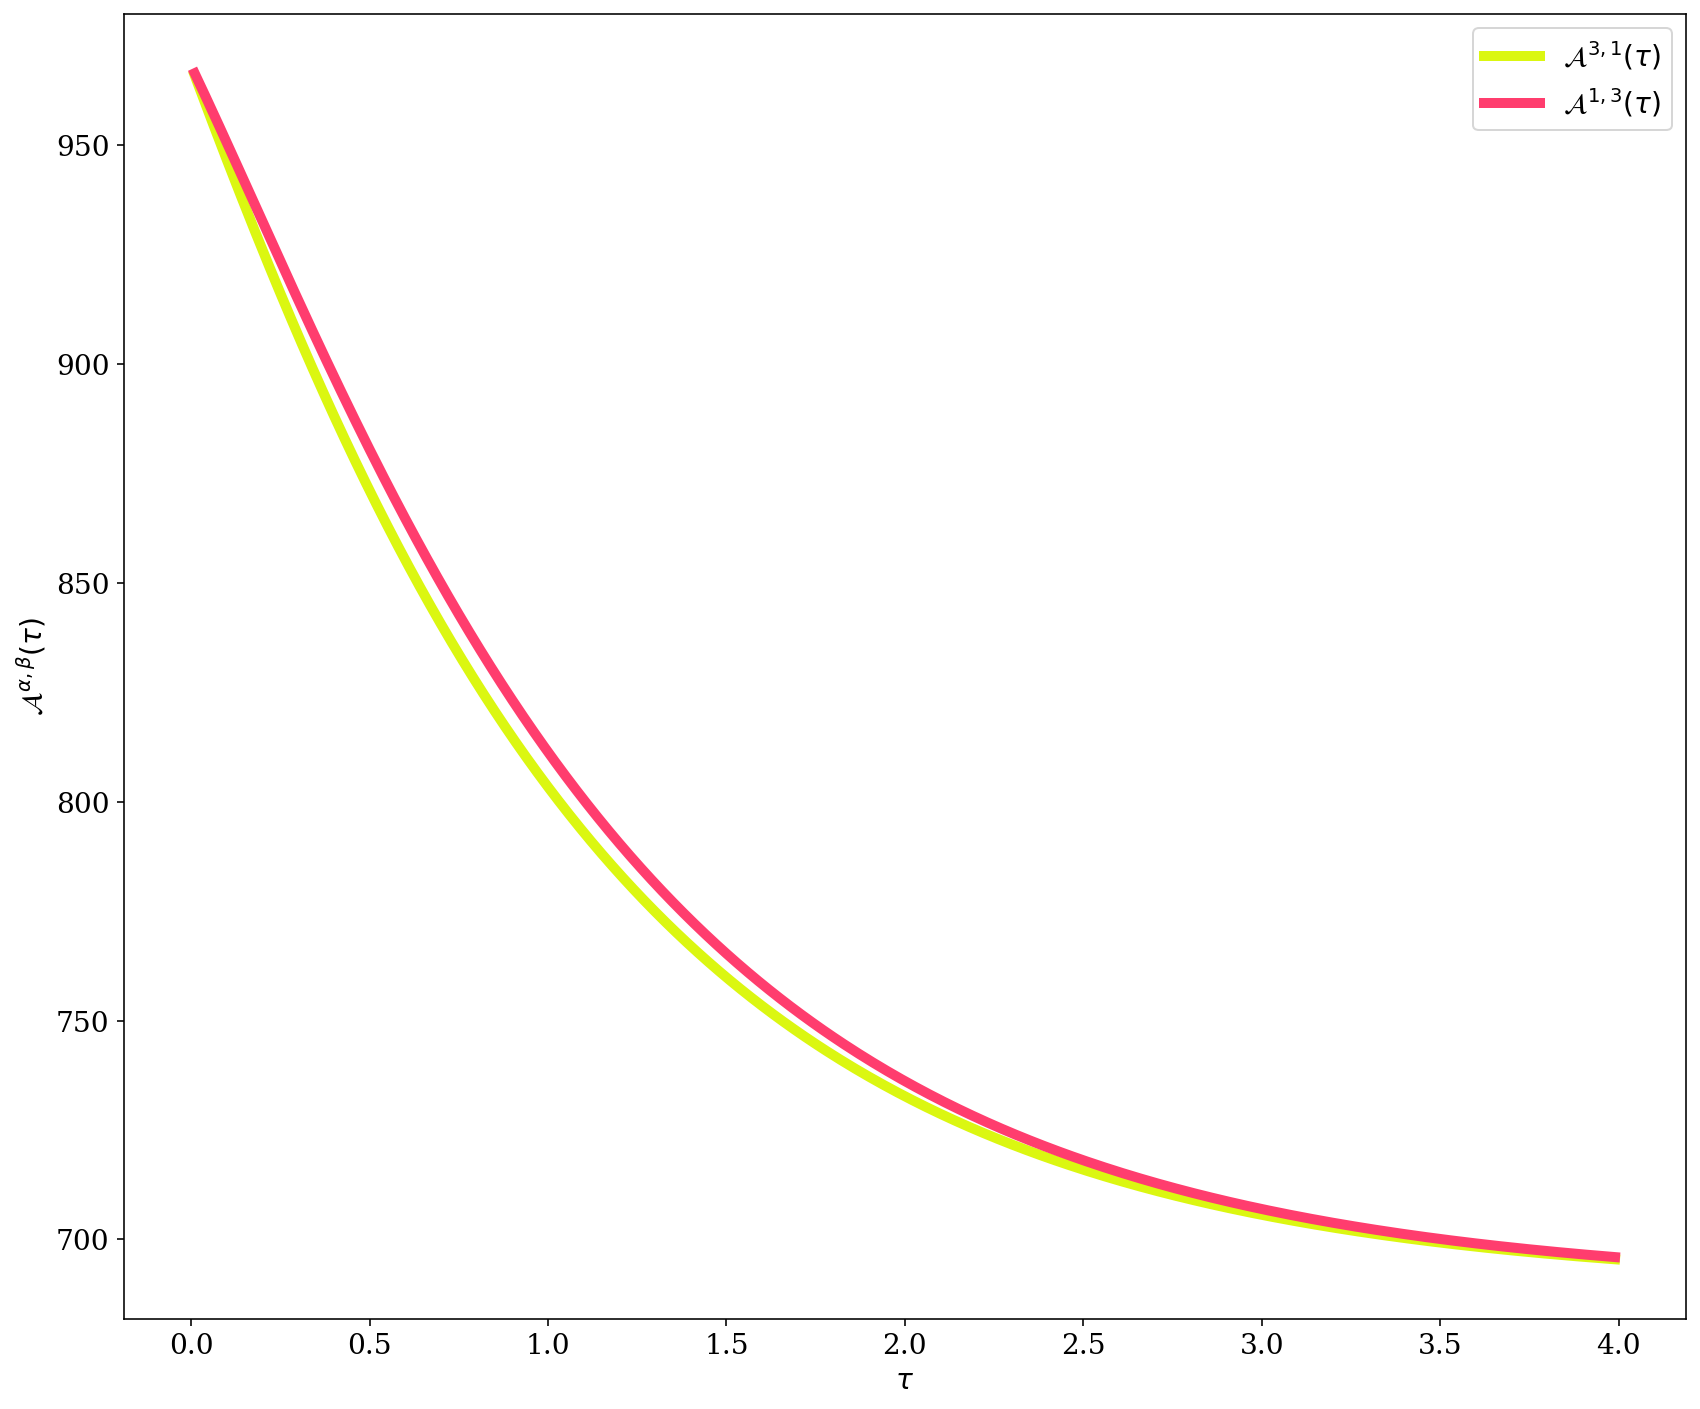

In [14]:
fig = plt.figure()
plt.plot(tau,a_13,label=r'$\mathcal{A}^{3,1}(\tau)$',linewidth=5, c= superlime)
plt.plot(tau,a_31,label=r'$\mathcal{A}^{1,3}(\tau)$',linewidth=5,color=strawberrypink)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\mathcal{A}^{\alpha,\beta}(\tau)$")
plt.legend()
plt.show()
fig.savefig('figure_3A_legend.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

# Anomalous behavior of the Steinberg signature $\mathcal{I}^{1,3}(G)$ in response to increasing entropy production

Define the starting parameters for K.

In [15]:
params = [8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181]

In [16]:
num_simulations = 6
num_perturbations = 2000
num_params = 6

signal = [3,5,7]
tau = np.around(np.arange(0.01,2.0,step=.01), decimals = 2)

mega_affinities = np.zeros((num_simulations,num_perturbations))
mega_areas = np.zeros((num_simulations,num_perturbations))
param_choices = np.arange(0,6)

In [ ]:
for j in range(num_simulations):
    
    # arrays for force/area tracking
    affinities = np.zeros(num_perturbations)
    areas = np.zeros(num_perturbations)
    
    # reset the initial equilibrium parameters
    params = [8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181]
    
    # determine which parameter to perturb from its equilibrium value
    param_choice = param_choices[j]
    
    # equilibrium conditions
    affinities[0] = cycle_affinity_K(params)
    L = Laplacian_K(params)
    
    a_13, a_31 = autocorrelation_analytical(signal,L,tau,alpha=1,beta=3)
    areas[0] = numerical_area(a_13, a_31)
    
    for i in tqdm(range(1,num_perturbations)):
        params[param_choice] = params[param_choice]*1.01

        affinities[i] = cycle_affinity_K(params)

        L = Laplacian_K(params)

        a_13, a_31 = autocorrelation_analytical(signal,L,tau,alpha=1,beta=3)

        areas[i] = numerical_area(a_13,a_31)
    
    mega_affinities[j,] = affinities
    mega_areas[j,] = areas

 89%|██████████████████████████████████▋    | 1776/1999 [03:08<00:24,  9.28it/s]

In [32]:
colors = [viridian, orangered, what, mango, dullerorange, brighterturquoise]
len(colors)

6

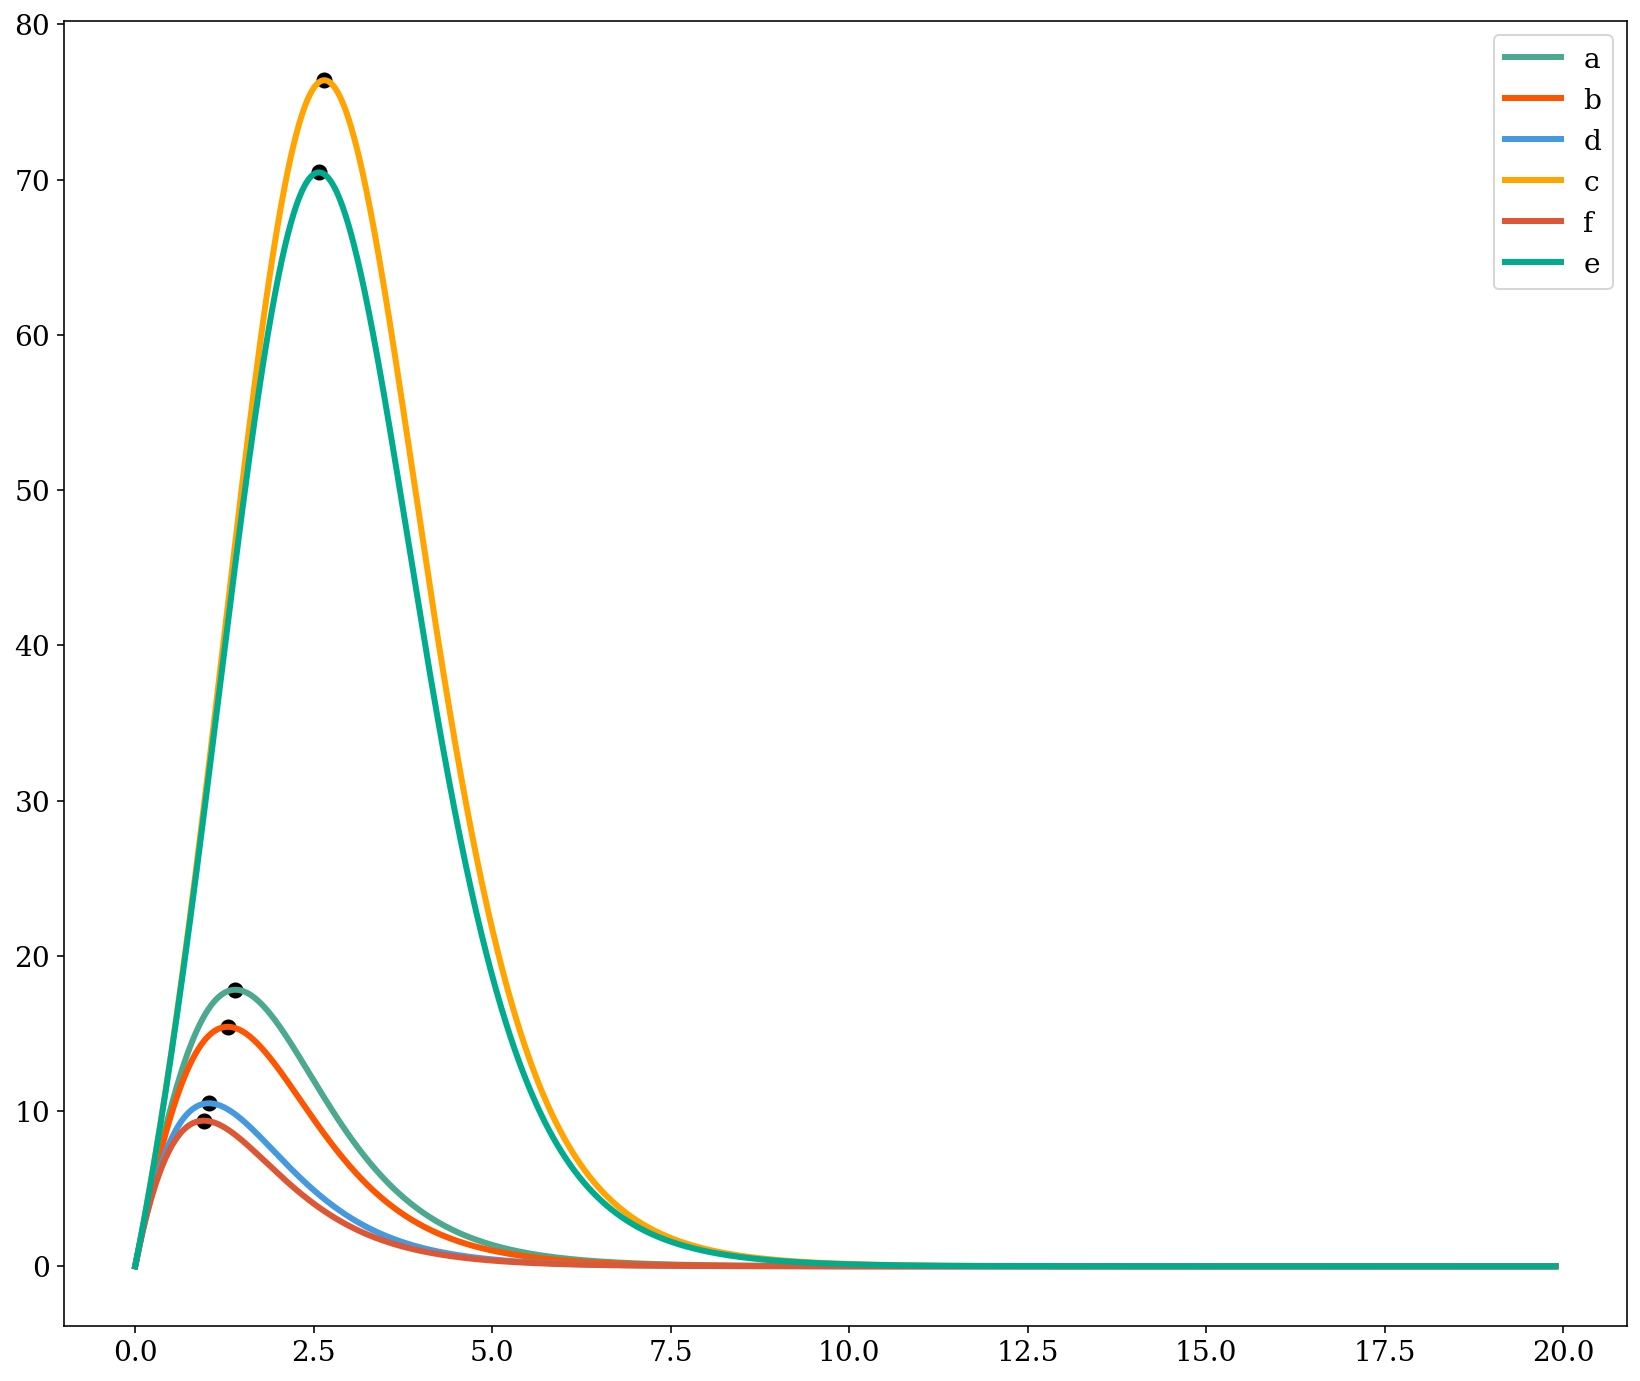

In [33]:
fig, ax = plt.subplots(figsize = (14, 12))
for i in range(num_simulations):
    #print(mega_omegas[i,:])
    #print(param_choices[i])
    #plt.semilogy(mega_affinities[i,:], mega_areas[i,:],label=(omega_labels[i],paramchoice_labels[i]),color=colors[i],linewidth=3)
    plt.plot(mega_affinities[i,:], mega_areas[i,:],label=(paramchoice_labels[i]),color = colors[i],linewidth=3)
plt.legend()
ax.scatter(mega_affinities[np.arange(num_simulations), idx],mega_areas[np.arange(num_simulations), idx],color='black',marker='o',linewidth=2)
plt.show()
fig.savefig('forcearea-1-allparams-redone.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')